In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sir_simulation_classes import SIR
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display


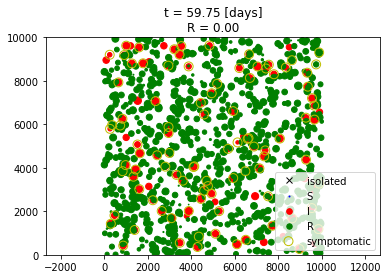


100%|████████████████████████████████████████████████████████████████████████████████| 239/239 [00:56<00:00,  4.34it/s]
C:\Users\Shai\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Text(0,0.5,'Reproduction number')

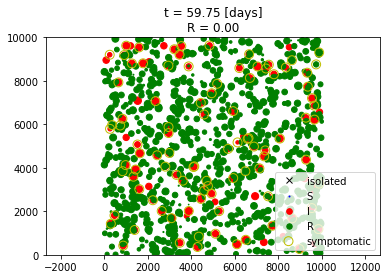

<Figure size 432x288 with 0 Axes>

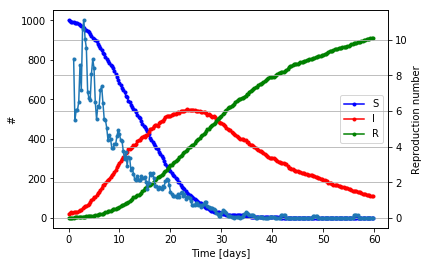

In [8]:
params = {
    'n_days': 60,
    'iter_per_day': 4,
    'init_status': {'S': 1000, 'I': 20, 'R': 0},
    'I_init_pos': None,  # [500, 500],  # if None, infected people are randomly spread
    'map_size': 10000,
    'step_size_iter': 50,
    'random_state': 42,
    'infection_radius': 100,
    'infection_duration': 20,
    'symptoms_prob': 0.2,
    'days_to_symptoms': 10,
    'non_infective_symptoms_prob': 0.01,  # the probability that a non-infective will show symptoms
    'tests_per_day': 2
}
status_colors = {'S': 'b', 'I': 'r', 'R': 'g'}
sir = SIR(params)
outputs = sir.run_sim(real_time_plot=True, frame_delay=1e-10, display=display, status_colors=status_colors)
plt.figure().show()
outputs_df = pd.DataFrame(outputs)
fig, ax = plt.subplots()
for status, c in status_colors.items():
    _  = ax.plot(outputs_df.t, outputs_df[status], '.-', c=c, label=status)
plt.ylabel('#')
plt.xlabel('Time [days]')
ax2 = ax.twinx()
ax2.plot(outputs_df.t, outputs_df.rep_num.rolling(4).mean(), '.-', label='Reproduction number')
ax.legend()
ax2.grid()
ax2.set_ylabel('Reproduction number')